In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [297]:
df = pd.read_csv('survey_results_public.csv')

In [298]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


### Data Cleaning

In [299]:
df.shape

(89184, 84)

In [300]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0


In [301]:
df.isnull().sum()

Country          1211
EdLevel          1211
YearsCodePro    23048
Employment       1286
Salary          41165
dtype: int64

In [302]:
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [303]:
df.isnull().sum()

Country           0
EdLevel           0
YearsCodePro    194
Employment       12
Salary            0
dtype: int64

In [304]:
df = df.dropna()

In [305]:
df.shape

(47813, 5)

In [306]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [307]:
df = df.drop( "Employment", axis=1)


In [308]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0


In [309]:
df['Country'].value_counts()

Country
United States of America                                11846
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
                                                        ...  
Guinea-Bissau                                               1
Mauritania                                                  1
Botswana                                                    1
Guyana                                                      1
Antigua and Barbuda                                         1
Name: count, Length: 171, dtype: int64

In [310]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [311]:
country_map = shorten_categories(df.Country.value_counts(), 400)

In [312]:
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()

Country
United States of America                                11846
Other                                                    8307
Germany                                                  3947
United Kingdom of Great Britain and Northern Ireland     3521
Canada                                                   2095
India                                                    1849
France                                                   1793
Netherlands                                              1359
Poland                                                   1265
Brazil                                                   1249
Australia                                                1206
Spain                                                    1142
Sweden                                                   1055
Italy                                                    1009
Switzerland                                               659
Austria                                                   531


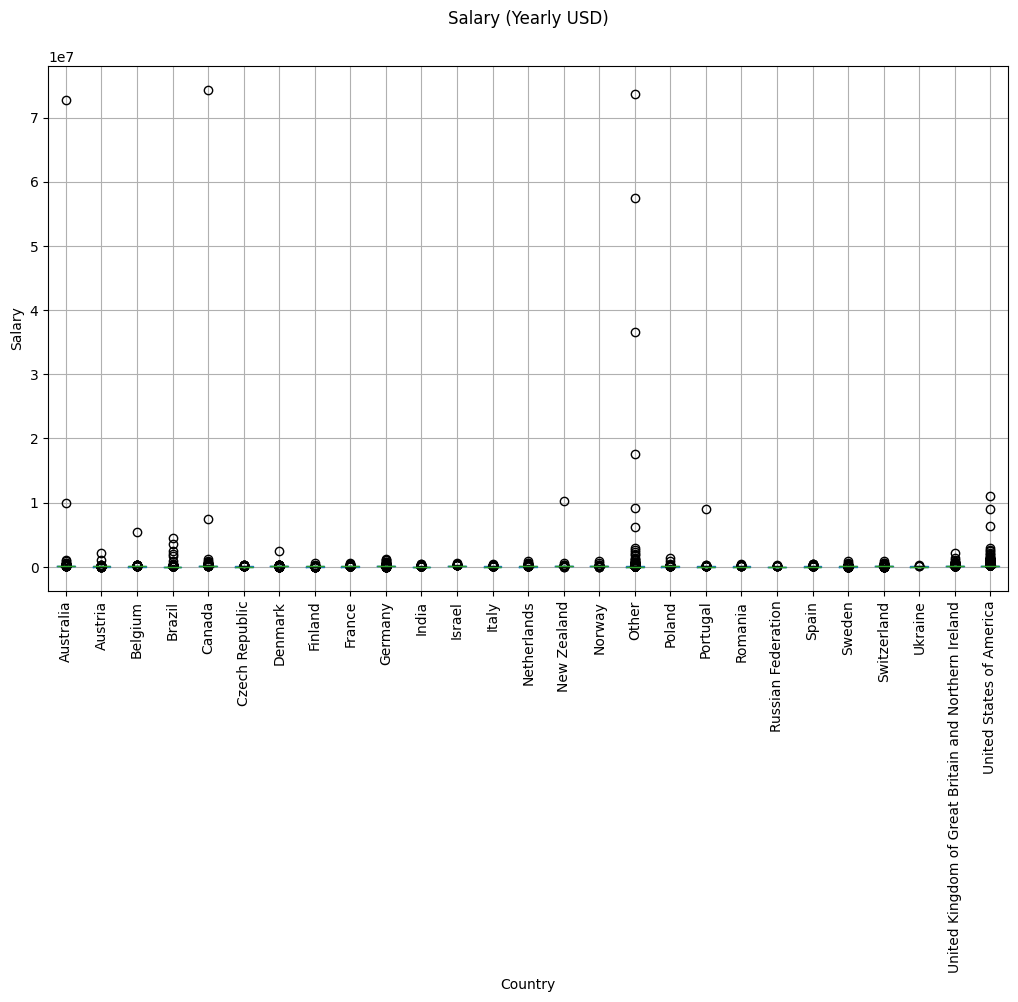

In [313]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (Yearly USD)')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [314]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Other']

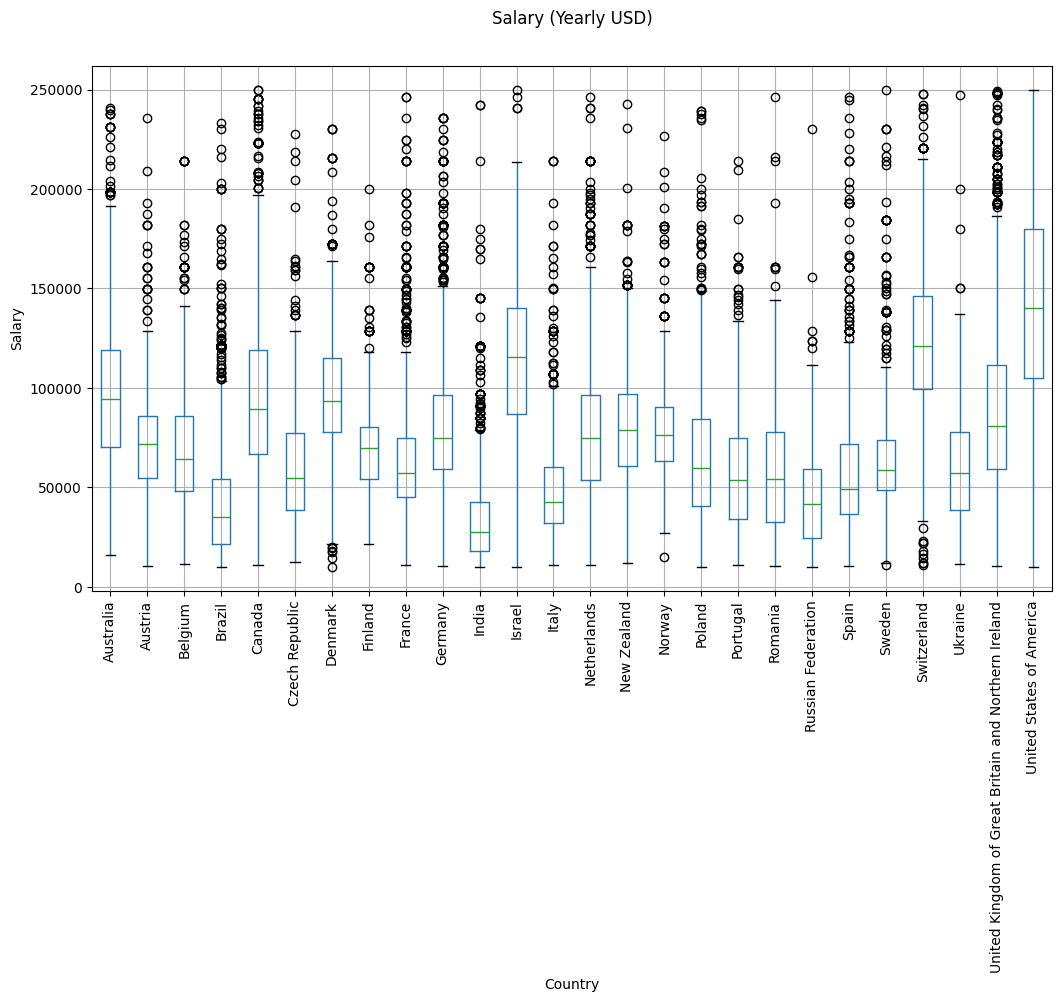

In [315]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (Yearly USD)')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [316]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [317]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelors degree'
    if 'Master’s degree' in x:
        return 'Masters degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'


df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [318]:
df['EdLevel'].unique()

array(['Bachelors degree', 'Less than a Bachelors', 'Masters degree',
       'Post grad'], dtype=object)

In [319]:
from sklearn.preprocessing import LabelEncoder
country_encoder = LabelEncoder()
edlevel_encoder = LabelEncoder()

In [320]:

df['Country'] = country_encoder.fit_transform(df['Country'])
df['EdLevel'] = edlevel_encoder.fit_transform(df['EdLevel'])

In [321]:
df[:10]

,Country,EdLevel,YearsCodePro,Salary
2,25,0,23.0,250000.0
3,25,0,7.0,156000.0
5,24,1,21.0,96828.0
6,25,1,3.0,135000.0
7,25,0,3.0,80000.0
8,7,2,15.0,64254.0
11,0,0,9.0,78003.0
12,25,0,9.0,75000.0
13,25,2,0.5,150000.0
14,13,2,7.0,187407.0


In [322]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

x = df.drop('Salary', axis=1)
y = df['Salary']

In [323]:
model = LinearRegression()
model.fit(x, y.values)

LinearRegression()

In [324]:
y_pred = model.predict(x)

In [325]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
error = np.sqrt(mean_squared_error(y, y_pred))
error

46552.17293229581

In [326]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=10)
model.fit(x, y.values)
y_pred = model.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
error

35740.96569303672

In [327]:
from sklearn.tree  import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x, y.values)
y_pred = model.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
error

34551.31499325552

In [328]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
param_grid = {'max_depth': max_depth}

model = DecisionTreeRegressor()
gs = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
gs.fit(x, y.values)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [329]:
model = gs.best_estimator_
model.fit(x, y.values)
y_pred = model.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
error



35985.58090748645

In [330]:
x

,Country,EdLevel,YearsCodePro
2,25,0,23.0
3,25,0,7.0
5,24,1,21.0
6,25,1,3.0
7,25,0,3.0
...,...,...,...
89156,25,0,8.0
89158,21,0,8.0
89162,3,2,24.0
89167,10,0,2.0


In [331]:
# New data point
X = np.array([['United States of America', 'Bachelors degree', 15]])

# Transform new data point using the same encoders
X[:, 0] = country_encoder.transform(X[:, 0])
X[:, 1] = edlevel_encoder.transform(X[:, 1])
X = X.astype(float)


In [332]:
X

array([[25.,  0., 15.]])

In [333]:
y_pred = model.predict(X)
y_pred

c:\Users\Talal Mohiuddin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([162364.87265136])

In [334]:
import pickle

data = {"model" : model, "country_encoder": country_encoder, "edlevel_encoder": edlevel_encoder}

In [338]:
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [339]:
with open('saved_steps.pkl', 'rb') as file:
        data = pickle.load(file)
    

model = data['model']
country_encoder = data['country_encoder']
edlevel_encoder = data['edlevel_encoder']


In [337]:
y_pred = model.predict(X)
y_pred

c:\Users\Talal Mohiuddin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([162364.87265136])